In [ ]:
import pandas as pd
import matplotlib as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import seaborn as sns
from sklearn import tree
import numpy as np
import math

In [ ]:
df = pd.read_csv('C:/Users/jeane/Desktop/USXX/Machine_Learning/UTSEUS-anjuke-real-estate-baoshan.csv')
df.head()

In [4]:
X = df[['longitude','latitude','bedroom','room','surface']]
Y = df['onesquaremeter']

In [5]:
gdf = gpd.GeoDataFrame(df, geometry = [Point(x,y) for x,y in zip(df.longitude, df.latitude)])
gdf.crs = {'init' : 'epsg:4326'}
shPoly = Polygon([(121.10157, 30.975), (121.10157, 31.514999), (121.804611, 31.514999), (121.804611, 30.975)])

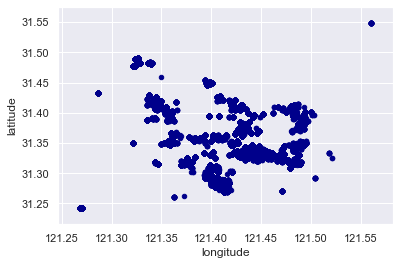

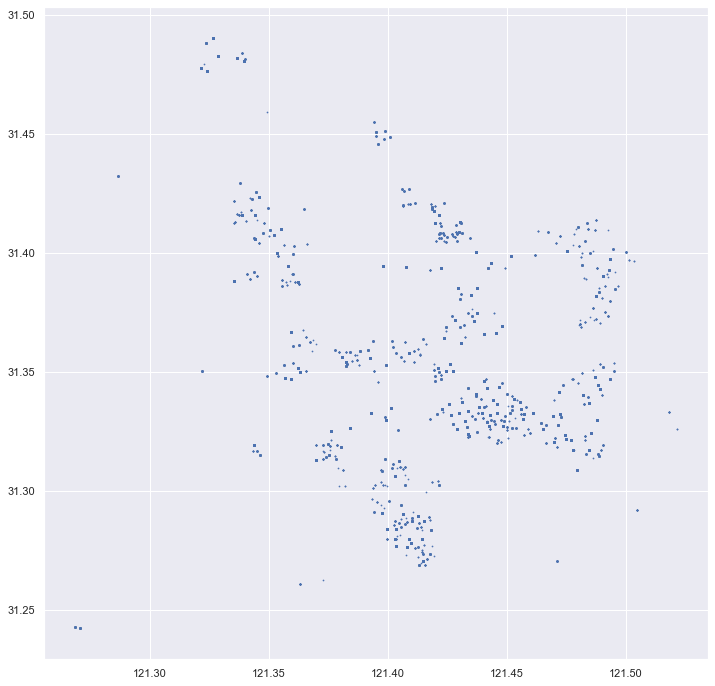

In [6]:
%matplotlib inline
sns.set()
gdf = gdf[gdf.geometry.within(shPoly)]
gdf.plot(markersize=0.5, figsize=(18,12))

(array([1.000e+00, 6.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 9.000e+00,
        7.000e+00, 5.000e+00, 4.200e+01, 6.700e+01, 3.800e+01, 2.000e+01,
        1.730e+02, 1.810e+02, 2.190e+02, 2.840e+02, 1.390e+02, 1.600e+02,
        1.310e+02, 1.420e+02, 3.620e+02, 2.580e+02, 3.280e+02, 4.490e+02,
        4.200e+02, 4.340e+02, 3.820e+02, 2.980e+02, 3.130e+02, 2.590e+02,
        3.480e+02, 3.600e+02, 3.270e+02, 4.590e+02, 4.820e+02, 6.550e+02,
        7.510e+02, 9.160e+02, 1.013e+03, 1.096e+03, 1.358e+03, 1.356e+03,
        1.383e+03, 1.614e+03, 1.405e+03, 1.340e+03, 1.409e+03, 1.254e+03,
        1.330e+03, 9.770e+02, 1.126e+03, 8.660e+02, 8.720e+02, 7.570e+02,
        7.080e+02, 5.850e+02, 6.060e+02, 5.970e+02, 5.150e+02, 4.710e+02,
        3.200e+02, 3.640e+02, 2.910e+02, 2.410e+02, 2.540e+02, 2.290e+02,
        1.110e+02, 8.200e+01, 1.070e+02, 8.000e+01, 4.300e+01, 1.050e+02,
        3.100e+01, 1.700e+01, 1.600e+01, 6.000e+00, 1.000e+00, 5.000e+00,
        8.000e+00, 1.000e+00, 9.000e+0

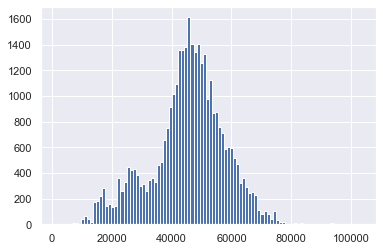

In [7]:
plt.pyplot.hist(Y, 100)

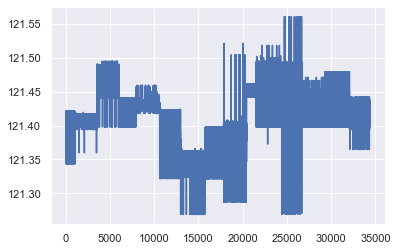

In [8]:
plt.pyplot.plot(X['longitude'])

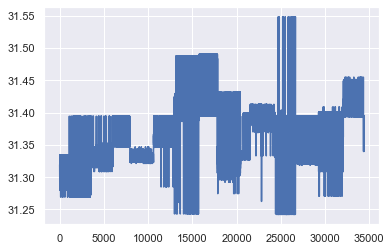

In [9]:
plt.pyplot.plot(X['latitude'])

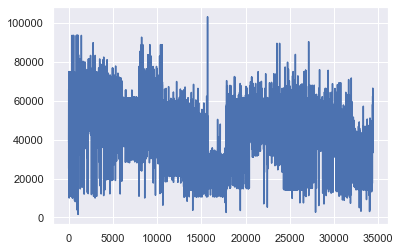

In [10]:
plt.pyplot.plot(Y)

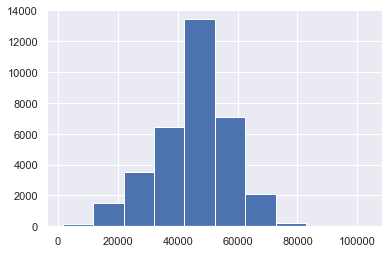

In [11]:
%matplotlib inline
Y.hist()

In [12]:
medianY = np.median(Y)

In [13]:
Z = pd.DataFrame.copy(Y)
Z[Y <= np.percentile(Y, 0.20)] = "Very cheap"
Z[(Y > np.percentile(Y, 0.20)) & (Y < np.percentile(Y, 0.40))] = "Cheap"
Z[(Y > np.percentile(Y, 0.40)) & (Y < np.percentile(Y, 0.60))] = "Medium"
Z[(Y > np.percentile(Y, 0.60)) & (Y < np.percentile(Y, 0.80))] = "Expensive"
Z[Y > np.percentile(Y, 0.80)] = "Very expensive"

In [14]:
df2 = pd.DataFrame.copy(X)
df2['class'] = Z

In [15]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Z)

In [16]:
from sklearn.model_selection import train_test_split
def splitTrainTest(df, testSize = 0.3, nameColumnClass = 'class'):
    train, test = train_test_split(df, test_size=testSize, shuffle=True)
    result = [train.drop(columns=[nameColumnClass]), train[nameColumnClass], test.drop(columns=[nameColumnClass]), test[nameColumnClass]]
    return result

In [17]:
X_train, Z_train, X_test, Z_test = splitTrainTest(df2) #by default the test part represent 30% of the data

In [18]:
print(len(X_train))
print(len(X_test))
print(len(X_test)/(len(X_train)+len(X_test)))

24091
10325
0.3000058112505811


In [19]:
#We calculate the model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Z_train)

In [20]:
#We launch the prediction/validation on the test value
prediction = clf.predict(X_test)

In [21]:
np.mean(prediction == Z_test)

0.9898305084745763

In [22]:
# Without shuffle (we can see why the result is bad in the previous plot)
from sklearn.model_selection import cross_val_score
clf = tree.DecisionTreeClassifier(max_depth=5)
scores = cross_val_score(clf, X, Z, cv=5)
np.mean(scores)

0.9082470233170991

In [23]:
# With shuffle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
clf = tree.DecisionTreeClassifier(max_depth=5)
scores = cross_val_score(clf, X, Z, cv=ShuffleSplit(n_splits=5))
np.mean(scores)

0.9934921557234165

[Text(418.5, 453.0, 'X[1] <= 31.482\nentropy = 0.015\nsamples = 24091\nvalue = [49, 40, 46, 52, 23904]'),
 Text(209.25, 271.8, 'X[1] <= 31.419\nentropy = 0.012\nsamples = 23793\nvalue = [21, 39, 40, 46, 23647]'),
 Text(104.625, 90.59999999999997, 'entropy = 0.01\nsamples = 22882\nvalue = [16, 28, 32, 34, 22772]'),
 Text(313.875, 90.59999999999997, 'entropy = 0.077\nsamples = 911\nvalue = [5, 11, 8, 12, 875]'),
 Text(627.75, 271.8, 'X[0] <= 121.333\nentropy = 0.247\nsamples = 298\nvalue = [28, 1, 6, 6, 257]'),
 Text(523.125, 90.59999999999997, 'entropy = 0.0\nsamples = 219\nvalue = [0, 0, 0, 0, 219]'),
 Text(732.375, 90.59999999999997, 'entropy = 0.631\nsamples = 79\nvalue = [28, 1, 6, 6, 38]')]

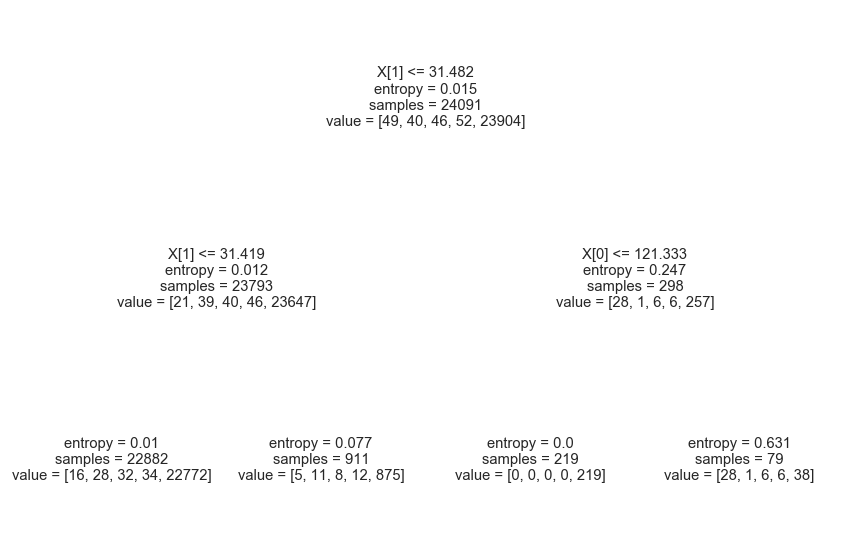

In [24]:
# We plot the decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, Z_train)
plt.pyplot.figure(figsize=(15,10))
tree.plot_tree(clf)

In [25]:
# We  want to determine the best CV
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
param_grid = {'max_depth': [2,4,6,8,10,20,40,100]}
#calibrated_decisionTree = CalibratedClassifierCV(base_estimator=tree.DecisionTreeClassifier())
search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv= ShuffleSplit(n_splits=5))
search.fit(X,Z)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=None, train_size=None),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6, 

In [26]:
# We get the max_depth
search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
search.best_params_

{'max_depth': 10}

In [28]:
# result: max_depth = 40
clf = tree.DecisionTreeClassifier(max_depth=40)
scores = cross_val_score(clf, X, Z, cv=ShuffleSplit(n_splits=5))
np.mean(scores)

0.9927367809413132

In [29]:
clf = tree.DecisionTreeClassifier(max_depth=40)
clf = clf.fit(X_train, Z_train)
prediction = clf.predict(X_test)
np.mean(prediction == Z_test)

0.9900242130750605

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=40, random_state=0, n_estimators = 100)
clf = clf.fit(X_train, Z_train)
prediction = clf.predict(X_test)
np.mean(prediction == Z_test)
param_grid = {'max_depth': [2,4,6,8,10,20,40,100], "n_estimators" : [2,4,6,8,10,20,40,50,60,70,80,90,100]}
search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv= ShuffleSplit(n_splits=5))
search.fit(X,Z)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=None, train_size=None),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose

In [31]:
search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [32]:
search.best_params_

{'max_depth': 10, 'n_estimators': 10}

In [33]:
search.best_score_

0.9937245787332946

In [34]:
search.best_params_

{'max_depth': 10, 'n_estimators': 10}

In [35]:
search.best_score_

0.9937245787332946

In [36]:
from sklearn.ensemble import AdaBoostClassifier
param_grid = {"n_estimators" : [2,4,6,8,10,20,40,50,60,70,80,90,100]}
clf = AdaBoostClassifier()
clf = clf.fit(X_train, Z_train)
prediction = clf.predict(X_test)
np.mean(prediction == Z_test)
search = GridSearchCV(clf, param_grid, cv=5)
search.fit(X,Z)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': [2, 4, 6, 8, 10, 20, 40, 50, 60, 70,
                                          80, 90, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [37]:
search.best_params_

{'n_estimators': 2}

In [38]:
search.best_score_

0.9914865178986518